# Model Fitting and Evaluation Lab "continued" DAY 3 LAB

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv ("file:///Users/genevauy/Desktop/Data_Marketing_Customer_Analysis_Round3.csv")

In [37]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


#### Dropping the effective_to_date column as it became problematic during pd.get_dummies

In [38]:
df = df.drop('effective_to_date', axis=1).reset_index(drop=True)

df


,region,customer_lifetime_value,response,coverage,education,month,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,feb,employed,m,48029,suburban,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,jan,unemployed,f,92260,suburban,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,feb,employed,m,22139,suburban,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,jan,employed,m,49078,suburban,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,jan,medical leave,f,23675,suburban,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,jan,unemployed,f,61541,suburban,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,jan,employed,f,61146,urban,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,feb,employed,f,39837,rural,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,feb,employed,f,64195,urban,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## Dividing the DataFrame into numerical and categorical

In [39]:
categorical = df.select_dtypes(include=['object', 'category'])

numerical = df.select_dtypes(include=['int', 'float'])

print("Categorical variables:")
print(categorical.columns)

print("\nNumerical variables:")
print(numerical.columns)


Categorical variables:
Index(['region', 'response', 'coverage', 'education', 'month',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

Numerical variables:
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


In [40]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


# Categorical

In [41]:
categorical

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [42]:
# Assuming you have a DataFrame named 'categorical'

data_types = categorical.dtypes

print(data_types)


region               object
response             object
coverage             object
education            object
month                object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object


In [43]:
categorical['education'].head(10)

0                 college
1                 college
2                bachelor
3                 college
4                bachelor
5    high school or below
6                  doctor
7    high school or below
8                 college
9                  master
Name: education, dtype: object

## Defining the ordinal and nominal columns 

In [44]:

ordinal_columns = ['coverage', 'education', 'renew_offer_type', 'vehicle_size','location_code','month']

all_columns = categorical.columns.tolist()

nominal_columns = [col for col in all_columns if col not in ordinal_columns]

print("Ordinal columns:")
print(ordinal_columns)
print("\nNominal columns:")
print(nominal_columns)


Ordinal columns:
['coverage', 'education', 'renew_offer_type', 'vehicle_size', 'location_code', 'month']

Nominal columns:
['region', 'response', 'employment_status', 'gender', 'marital_status', 'policy_type', 'policy', 'sales_channel', 'vehicle_class']


### Using get_dummies for the nominal columns 

In [45]:
nominal_encoded = pd.get_dummies(categorical[nominal_columns])

nominal_encoded

,region_central,region_east,region_north west,region_west region,response_no,response_yes,employment_status_disabled,employment_status_employed,employment_status_medical leave,employment_status_retired,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
10686,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
10687,0,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


### control data

In [46]:
categorical['education'].head(10)

0                 college
1                 college
2                bachelor
3                 college
4                bachelor
5    high school or below
6                  doctor
7    high school or below
8                 college
9                  master
Name: education, dtype: object

## using Ordinal Encoder for ordinal_columns

In [50]:
from sklearn.preprocessing import OrdinalEncoder

education_hierarchy = ['high school or below', 'college', 'bachelor', 'master', 'doctor']
coverage_hierarchy = ['basic', 'extended', 'premium']
renew_offer_type_hierarchy = ['offer1', 'offer2', 'offer3', 'offer4']
vehicle_size_hierarchy = ['small', 'medsize', 'large']
location_code_hierarchy = ['rural','suburban','urban']
month_hierarchy = ['jan','feb']

encoder1 = OrdinalEncoder(categories=[education_hierarchy])
encoder2 = OrdinalEncoder(categories=[coverage_hierarchy])
encoder3 = OrdinalEncoder(categories=[renew_offer_type_hierarchy])
encoder4 = OrdinalEncoder(categories=[vehicle_size_hierarchy])
encoder5 = OrdinalEncoder(categories=[location_code_hierarchy])
encoder6 = OrdinalEncoder(categories=[month_hierarchy])

ordinal_encoded = pd.DataFrame({
    'education_encoded': encoder1.fit_transform(df[['education']]).flatten().astype(int),
    'coverage_encoded': encoder2.fit_transform(df[['coverage']]).flatten().astype(int),
    'renew_offer_type_encoded': encoder3.fit_transform(df[['renew_offer_type']]).flatten().astype(int),
    'vehicle_size_encoded': encoder4.fit_transform(df[['vehicle_size']]).flatten().astype(int),
    'location_code_encoded': encoder5.fit_transform(df[['location_code']]).flatten().astype(int),
    'month_encoded': encoder6.fit_transform(df[['month']]).flatten().astype(int)}) #storing the results in a DataFrame named "ordinal_encoded"
# .flatten().astype(int)  convert the resulting 2D array into a 1D array and ensure the data type is integer.

In [51]:
ordinal_encoded

,education_encoded,coverage_encoded,renew_offer_type_encoded,vehicle_size_encoded,location_code_encoded,month_encoded
0,1,0,2,1,1,1
1,1,0,3,1,1,0
2,2,0,2,1,1,1
3,1,1,1,1,1,0
4,2,2,0,1,1,0
...,...,...,...,...,...,...
10684,2,2,2,1,1,0
10685,1,0,1,1,2,0
10686,2,1,0,1,0,1
10687,1,2,0,1,2,1


### compare this to control:

In [52]:
ordinal_encoded ['education_encoded'].head(10)

0    1
1    1
2    2
3    1
4    2
5    0
6    4
7    0
8    1
9    3
Name: education_encoded, dtype: int64

# Concatenate ordinal_encoded and nominal_encoded as categorical_encoded

In [53]:
categorical_encoded = pd.concat([ordinal_encoded, nominal_encoded], axis=1)


In [54]:
categorical_encoded

,education_encoded,coverage_encoded,renew_offer_type_encoded,vehicle_size_encoded,location_code_encoded,month_encoded,region_central,region_east,region_north west,region_west region,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,1,0,2,1,1,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,3,1,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,2,0,2,1,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,1,1,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,2,2,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,2,2,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,1,0,1,1,2,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
10686,2,1,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10687,1,2,0,1,2,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


### Concatenate categorical_encoded and numerical

In [55]:
final_df = pd.concat([categorical_encoded, numerical], axis=1)


In [56]:
final_df

,education_encoded,coverage_encoded,renew_offer_type_encoded,vehicle_size_encoded,location_code_encoded,month_encoded,region_central,region_east,region_north west,region_west region,...,vehicle_class_suv,vehicle_class_two-door car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,1,0,2,1,1,1,1,0,0,0,...,0,0,4809,48029,61,7,52,0,9,292
1,1,0,3,1,1,0,0,0,0,1,...,0,0,2228,92260,64,3,26,0,1,744
2,2,0,2,1,1,1,0,1,0,0,...,1,0,14947,22139,100,34,31,0,2,480
3,1,1,1,1,1,0,0,0,1,0,...,0,0,22332,49078,97,10,3,0,2,484
4,2,2,0,1,1,0,0,0,1,0,...,0,0,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,2,2,1,1,0,1,0,0,0,...,0,0,15563,61541,253,12,40,0,7,1214
10685,1,0,1,1,2,0,0,0,1,0,...,0,0,5259,61146,65,7,68,0,6,273
10686,2,1,0,1,0,1,1,0,0,0,...,0,0,23893,39837,201,11,63,0,2,381
10687,1,2,0,1,2,1,0,0,0,1,...,1,0,11971,64195,158,0,27,4,6,618


In [57]:
final_df.columns.tolist()

['education_encoded',
 'coverage_encoded',
 'renew_offer_type_encoded',
 'vehicle_size_encoded',
 'location_code_encoded',
 'month_encoded',
 'region_central',
 'region_east',
 'region_north west',
 'region_west region',
 'response_no',
 'response_yes',
 'employment_status_disabled',
 'employment_status_employed',
 'employment_status_medical leave',
 'employment_status_retired',
 'employment_status_unemployed',
 'gender_f',
 'gender_m',
 'marital_status_divorced',
 'marital_status_married',
 'marital_status_single',
 'policy_type_corporate auto',
 'policy_type_personal auto',
 'policy_type_special auto',
 'policy_corporate l1',
 'policy_corporate l2',
 'policy_corporate l3',
 'policy_personal l1',
 'policy_personal l2',
 'policy_personal l3',
 'policy_special l1',
 'policy_special l2',
 'policy_special l3',
 'sales_channel_agent',
 'sales_channel_branch',
 'sales_channel_call center',
 'sales_channel_web',
 'vehicle_class_four-door car',
 'vehicle_class_luxury car',
 'vehicle_class_lux

# X-Y SPLIT

In [61]:
X= final_df [['education_encoded',
 'coverage_encoded',
 'renew_offer_type_encoded',
 'vehicle_size_encoded',
 'location_code_encoded',
 'month_encoded',
 'region_central',
 'region_east',
 'region_north west',
 'region_west region',
 'response_no',
 'response_yes',
 'employment_status_disabled',
 'employment_status_employed',
 'employment_status_medical leave',
 'employment_status_retired',
 'employment_status_unemployed',
 'gender_f',
 'gender_m',
 'marital_status_divorced',
 'marital_status_married',
 'marital_status_single',
 'policy_type_corporate auto',
 'policy_type_personal auto',
 'policy_type_special auto',
 'policy_corporate l1',
 'policy_corporate l2',
 'policy_corporate l3',
 'policy_personal l1',
 'policy_personal l2',
 'policy_personal l3',
 'policy_special l1',
 'policy_special l2',
 'policy_special l3',
 'sales_channel_agent',
 'sales_channel_branch',
 'sales_channel_call center',
 'sales_channel_web',
 'vehicle_class_four-door car',
 'vehicle_class_luxury car',
 'vehicle_class_luxury suv',
 'vehicle_class_sports car',
 'vehicle_class_suv',
 'vehicle_class_two-door car',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']]
y = final_df ['total_claim_amount']

### Train-Test Split

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.3, random_state=42)

## Model Generation

In [63]:
from sklearn.linear_model import LinearRegression


In [64]:
lm = LinearRegression ()
model = lm.fit(X_train, y_train)

In [65]:
model.coef_

array([-2.07487377e+01, -4.37321571e+00,  4.91118517e+00, -3.14705484e+01,
        1.20486208e+02, -1.48339968e+00, -2.38446055e-01,  5.96804281e-01,
       -4.82020796e+00,  4.46184974e+00, -1.14116824e+01,  1.14116824e+01,
       -7.66330202e+00, -8.69636727e+01,  4.12309177e+00, -2.11679875e+01,
        1.11671870e+02, -1.56043780e+01,  1.56043780e+01, -2.17865628e+01,
       -3.37965875e+01,  5.55831503e+01, -2.75365690e+00, -6.77877644e-01,
        3.43153454e+00, -2.99630302e+00, -2.60695122e+00,  2.84959734e+00,
        6.06639582e+00, -3.54037382e+00, -3.20389964e+00,  4.34315554e+01,
       -3.06856792e+01, -9.31434166e+00, -8.81484032e-01, -2.04419131e+00,
        2.65910858e+00,  2.66566762e-01,  8.82992851e+00,  2.24137055e+01,
       -8.52881754e+00, -2.11201363e+01, -1.12778110e+01,  9.68313079e+00,
       -5.83388791e-05, -1.13771008e-03,  5.46263467e+00,  5.02349894e-02,
       -1.58893934e-01,  1.81083672e+00,  6.54097684e-01])

In [66]:
model.intercept_

-34.3993637996378

## Let's see if it works

In [67]:
y_test

3487      120
668       660
10315     244
5332       86
1523     1032
         ... 
5928      406
3706      321
7735       45
9320      597
7924       48
Name: total_claim_amount, Length: 3207, dtype: int64

In [68]:
y_pred = model.predict(X_test)

In [69]:
y_test - y_pred

3487      88.818891
668      208.084453
10315   -116.989070
5332      52.371760
1523      31.418292
            ...    
5928    -319.416070
3706     103.812956
7735    -185.708466
9320      32.385625
7924     -38.495909
Name: total_claim_amount, Length: 3207, dtype: float64

In [70]:
compare = pd.DataFrame ({'y_test':list (y_test),'y_pred':list (y_pred)})

In [71]:
compare

,y_test,y_pred
0,120,31.181109
1,660,451.915547
2,244,360.989070
3,86,33.628240
4,1032,1000.581708
...,...,...
3202,406,725.416070
3203,321,217.187044
3204,45,230.708466
3205,597,564.614375


## Model evaluation

In [72]:

from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

# Calculate MSE
mse = mse(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mae(y_test, y_pred)

# Calculate R2 score
r2 = r2(y_test, y_pred)

# Calculate Adjusted R2 score
n = X_test.shape[0]  # calculates the number of (row) samples - represents the total number of data points used to evaluate the model's performance.
p = X_test.shape[1]  # calculates the number of (column) features - epresents the total number of predictor variables used in the regression model.
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) # n-number of samples p-number of features

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)
print("Adjusted R2:", adjusted_r2)


MSE: 30593.942900943624
RMSE: 174.91124292321413
MAE: 129.248846467229
R2: 0.6336546388880611
Adjusted R2: 0.6277327328922737


ADJUSTED_R2


explanation of the formula:

(n - 1) represents the degrees of freedom for the residuals, which is the total number of samples minus 1. It measures the number of independent pieces of information available in the residuals.

(n - p - 1) represents the degrees of freedom for the regression, which is the total number of samples minus the number of predictors minus 1. It measures the number of independent pieces of information available in the regression.

(1 - R2) represents the discrepancy between the model's performance (R-squared) and a perfect fit (1).

(1 - R2) * (n - 1) / (n - p - 1) calculates the reduction in the degrees of freedom due to the inclusion of the predictors in the model.

1 - (1 - R2) * (n - 1) / (n - p - 1) adjusts the R-squared value by accounting for the reduction in degrees of freedom. This adjustment penalizes the model for including more predictors and provides a more accurate measure of the model's performance.

## Plotting

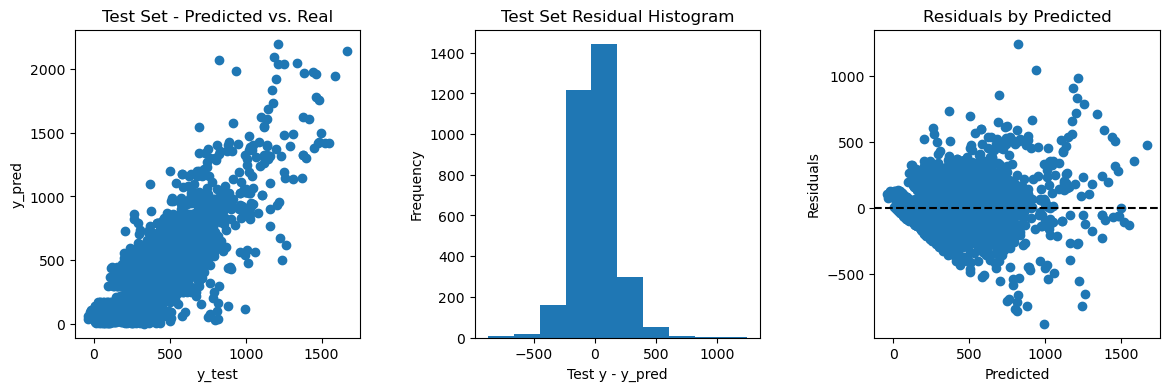

In [73]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs. Real")

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y - y_pred")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Test Set Residual Histogram")

ax[2].plot(y_pred, y_test - y_pred, "o")
ax[2].set_xlabel("Predicted")
ax[2].set_ylabel("Residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].axhline(0, linestyle='dashed', color='black')

plt.show()


## Feature Importance

In [76]:
coefs = np.array(model.coef_)

# Creating coef_df DataFrame
column_names = X.columns
coef_df = pd.DataFrame({"column_names": column_names, "coefs": coefs.flatten()})

coef_df

,column_names,coefs
0,education_encoded,-20.748738
1,coverage_encoded,-4.373216
2,renew_offer_type_encoded,4.911185
3,vehicle_size_encoded,-31.470548
4,location_code_encoded,120.486208
5,month_encoded,-1.483400
6,region_central,-0.238446
7,region_east,0.596804
8,region_north west,-4.820208
9,region_west region,4.461850


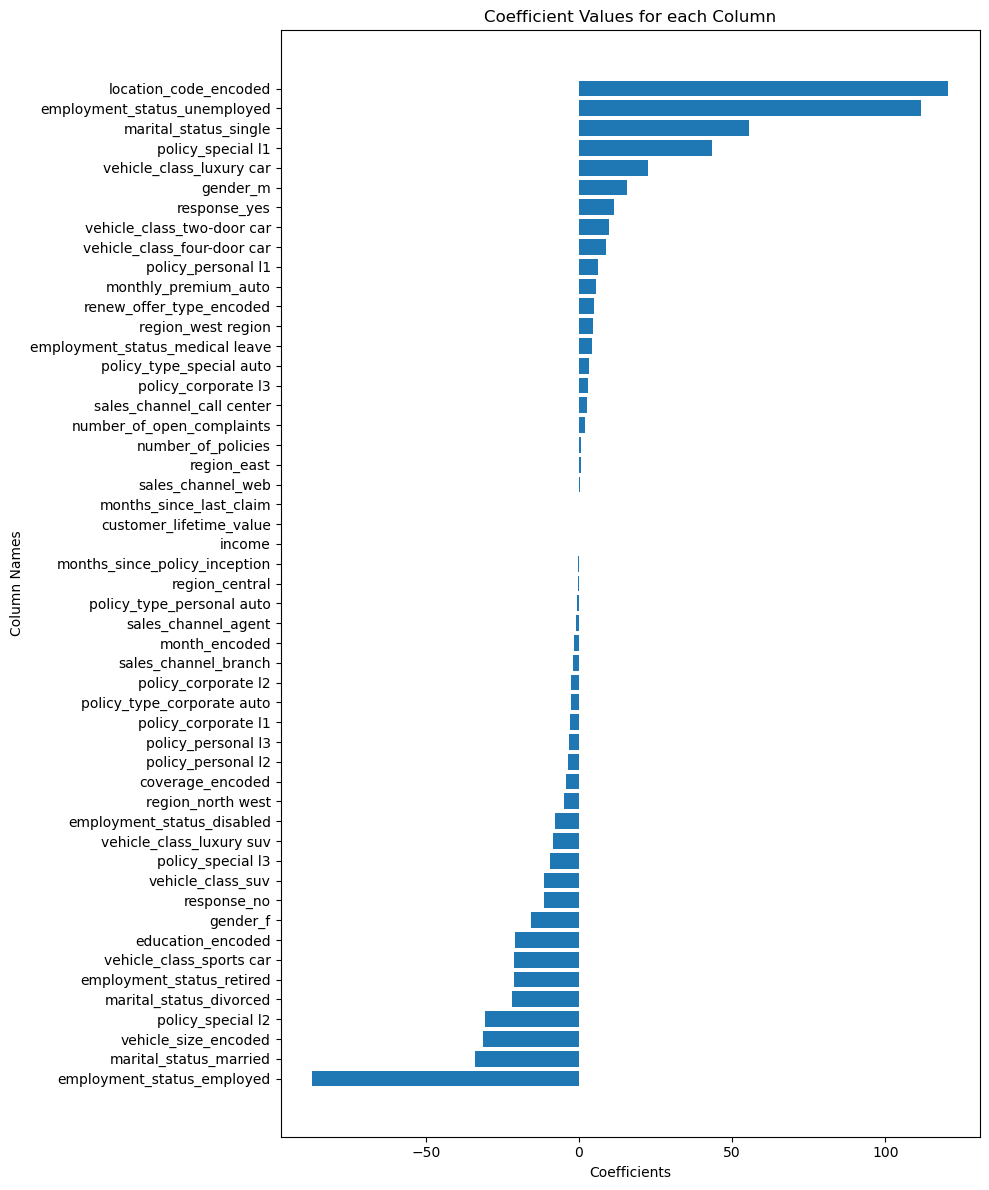

In [77]:
# Sorting the DataFrame by "coefs" column in ascending order
coef_df_sorted = coef_df.sort_values(by="coefs")

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 12))  # Increase the figure height to provide enough space for 45 bars
plt.barh(coef_df_sorted["column_names"], coef_df_sorted["coefs"])
plt.xlabel("Coefficients")
plt.ylabel("Column Names")
plt.title("Coefficient Values for each Column")

# Adjust the spacing between the bars and the y-axis labels
plt.subplots_adjust(left=0.25)

plt.tight_layout()  # Add spacing between the bars and the labels
plt.show()


### Remove the outliers then run it all again
